<a href="https://colab.research.google.com/github/davidrubior/ML_23/blob/main/KCHouse_David_Rubio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
data_orig = pd.read_csv('kc_house_data.csv', index_col='id')
data_orig.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data = data_orig.copy()
data['date'] = pd.to_datetime(data['date'])

In [ ]:
print(np.sort(data['view'].unique()))
print(np.sort(data['condition'].unique()))
print(np.sort(data['grade'].unique()))

[0 1 2 3 4]
[1 2 3 4 5]
[ 1  3  4  5  6  7  8  9 10 11 12 13]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

In [ ]:
sum(data.duplicated())

0

No hay missings ni duplicados y todos los tipos son ahora correctos.

Las variables en pies cuadrados no se van a transformar a metros cuadrados, no afecta al modelo.

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=23)
x_train = train.drop(['price', 'date'], axis=1) #no voy a usar la fecha para modelar
y_train = train['price']

In [ ]:
x_train.drop('zipcode', axis=1).describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,3.373279,2.114546,2077.570619,1.532745e+04,1.491151,0.007981,0.240197,3.410526,7.652747,1785.576518,291.994101,1970.840659,85.781377,47.559716,-122.214097,1983.628398,12857.660497
std,0.934579,0.772849,922.358292,4.340483e+04,0.537997,0.088985,0.775793,0.651666,1.172128,828.004089,443.035462,29.358172,404.840807,0.138625,0.141252,684.705308,27978.717559
min,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1420.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470625,-122.328000,1485.500000,5100.000000
50%,3.000000,2.250000,1910.000000,7.622500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,47.571100,-122.231000,1830.000000,7622.500000
75%,4.000000,2.500000,2550.000000,1.070600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1996.000000,0.000000,47.677900,-122.126000,2360.000000,10101.750000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='price', ylabel='Count'>

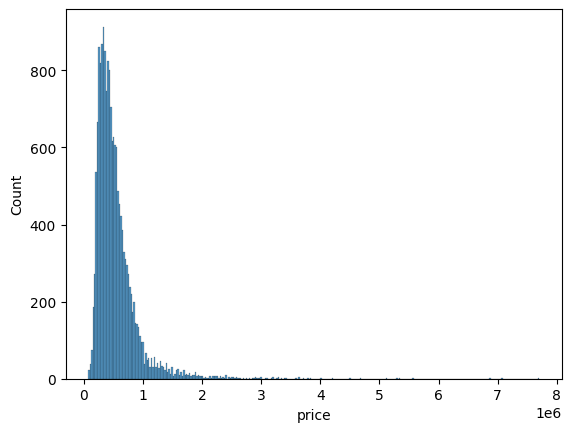

In [ ]:
sns.histplot(y_train)

<Axes: xlabel='price', ylabel='Count'>

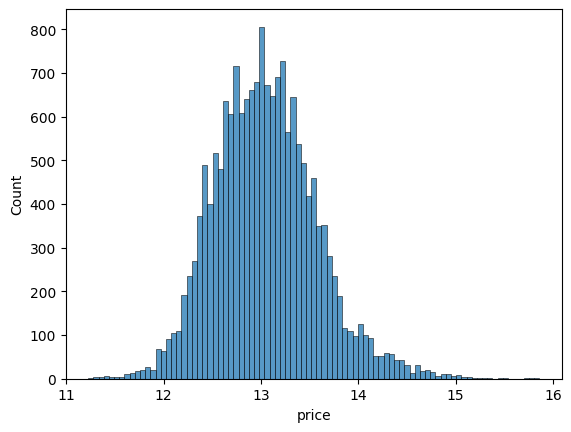

In [ ]:
log_precios = y_train.apply(math.log)
sns.histplot(log_precios)

<Axes: >

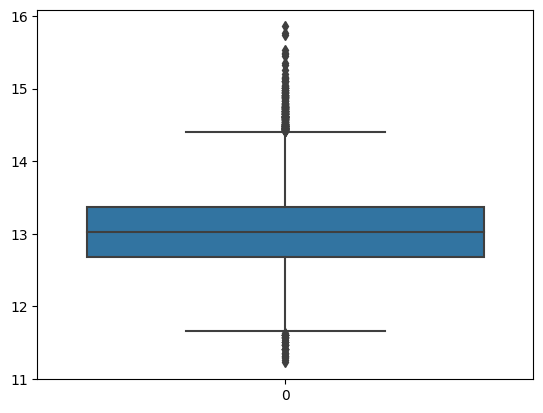

In [ ]:
sns.boxplot(log_precios.values)

In [ ]:
kurtosis(y_train.values), kurtosis(log_precios.values)

(37.650770984102024, 0.7424422541347679)

La Curtosis pasa a tener un valor mucho más cercano a uno.

In [ ]:
mu, sigma = np.mean(log_precios.values), np.std(log_precios.values)
val_1 = len(log_precios[(log_precios.values>mu-sigma) & (log_precios.values<mu+sigma)])/len(log_precios)
val_2 = len(log_precios[(log_precios.values>mu-2*sigma) & (log_precios.values<mu+2*sigma)])/len(log_precios)
val_3 = len(log_precios[(log_precios.values>mu-3*sigma) & (log_precios.values<mu+3*sigma)])/len(log_precios)
print(f'La media más menos una desviación típica contiene un {round(val_1*100, 2)}% de los datos.')
print(f'La media más menos dos desviaciones típicas contiene un {round(val_2*100, 2)}% de los datos.')
print(f'La media más menos tres desviaciones típicas  contiene un {round(val_3*100, 2)}% de los datos.')

La media más menos una desviación típica contiene un 70.02% de los datos.
La media más menos dos desviaciones típicas contiene un 95.22% de los datos.
La media más menos tres desviaciones típicas  contiene un 99.22% de los datos.


Aunque el primer intervalo contiene un porcentaje algo superior a lo estrictamente normal, consideramos la transformación logarítimica suficientemente buena.

Vamos a generar la variable *sqft_ratio*, la proporción de superficie habitable entre superficie total.

In [ ]:
x_train['sqft_ratio'] = x_train['sqft_living']/x_train['sqft_lot']

## Las zonas, los ZIP codes y sus precios

In [ ]:
zonas = train[['lat', 'long', 'zipcode', 'price']]
zonas.head()

,lat,long,zipcode,price
id,,,,
2126059295,47.7325,-122.165,98034,995500.0
1250202660,47.5917,-122.290,98144,825000.0
6804600240,47.7606,-122.167,98011,417000.0
6788201781,47.6398,-122.306,98112,886000.0
293070270,47.6178,-122.055,98074,922755.0


In [ ]:
(max(zonas['long'])-min(zonas['long']))/(max(zonas['lat'])-min(zonas['lat']))

1.9366253820170718

In [ ]:
cp = zonas['zipcode'].unique()
np.sort(cp)

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


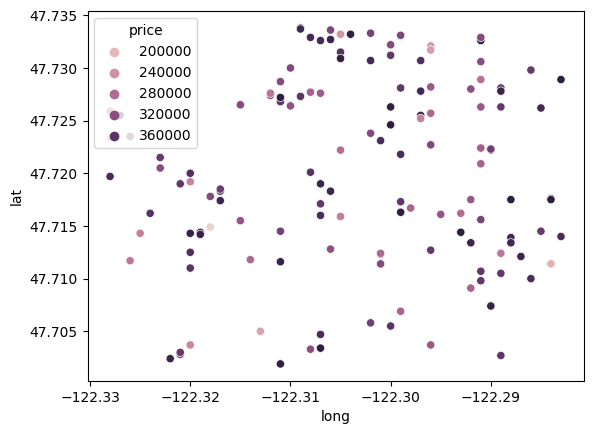

In [ ]:
sns.scatterplot(data=zonas[(zonas['zipcode']==98125) & (zonas['price']<400000)], x='long', y='lat', hue='price', cmap='coolwarm')
plt.show()

Observando un código postal al azar, no parece haber una distribución clara.

In [ ]:
longitud = []
latitud = []
precio = []

for ZIP in cp:
  subset = zonas[zonas['zipcode']==ZIP]
  longitud.append(np.mean(subset['long']))
  latitud.append(np.mean(subset['lat']))
  precio.append(np.median(subset['price']))

medias = pd.DataFrame(data={'zipcode': cp, 'longitud': longitud, 'latitud': latitud, 'precio': precio}).set_index('zipcode')
medias.head()

,longitud,latitud,precio
zipcode,,,
98034,-122.207392,47.720754,447450.0
98144,-122.298648,47.586638,450000.0
98011,-122.200769,47.754746,462500.0
98112,-122.297821,47.629694,950000.0
98074,-122.044787,47.623555,646500.0


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


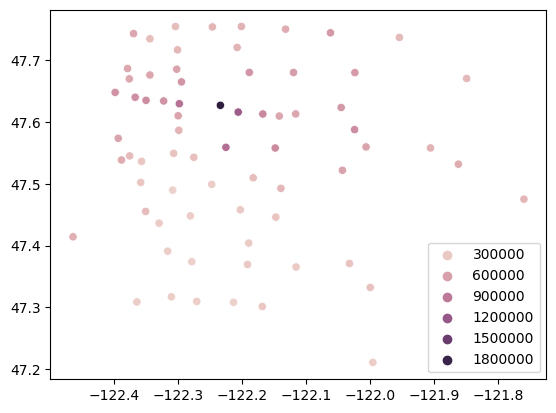

In [ ]:
sns.scatterplot(data=medias, x=longitud, y=latitud, hue=precio, cmap='coolwarm')
plt.show()

En cambio, sí parece haber un centro del condado de precios considerablemente más altos.

### Cálculo del centro de masas

In [ ]:
precio_tot = sum(medias['precio'])
long_center = sum(medias['longitud']*medias['precio'])/precio_tot
lat_center = sum(medias['latitud']*medias['precio'])/precio_tot

long_center, lat_center

(-122.21063846115864, 47.58473615789934)

In [ ]:
f = lambda x,y: ((x-long_center)**2+(y-lat_center)**2)**(1/2)
train['distancia'] = train.apply(lambda row: f(row['long'], row['lat']), axis=1)
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distancia
id,,,,,,,,,,,,,,,,,,,,,
2126059295,2014-08-05,995500.0,5,4.50,4280,8465,2.0,0,0,3,...,4280,0,2014,0,98034,47.7325,-122.165,2990,11067,0.154651
1250202660,2014-09-24,825000.0,4,1.00,2290,6300,1.5,0,4,4,...,2150,140,1921,0,98144,47.5917,-122.290,2390,6300,0.079666
6804600240,2015-02-11,417000.0,3,1.75,1920,9512,1.0,0,0,3,...,1440,480,1980,0,98011,47.7606,-122.167,1820,9512,0.181197
6788201781,2014-06-05,886000.0,4,2.00,2660,3900,1.5,0,0,4,...,1480,1180,1923,0,98112,47.6398,-122.306,2350,3900,0.110117
293070270,2014-11-04,922755.0,4,3.50,3560,4951,2.0,0,0,3,...,3560,0,2014,0,98074,47.6178,-122.055,3540,5500,0.159112


In [ ]:
x_train['distancia'] = train['distancia']

## Antigüedad de la última reforma

El último año sí queremos sacarlo de toda la base, no hay nada específico del entrenamiento en el subconjunto de train.

In [ ]:
data['yr_renovated'] = data.apply(lambda row: row['yr_built'] if row['yr_renovated']==0 else row['yr_renovated'], axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [ ]:
last = max(data['yr_renovated'])
x_train['reforma'] = last-x_train['yr_renovated']
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_ratio,distancia,reforma
id,,,,,,,,,,,,,,,,,,,,,
2126059295,5,4.50,4280,8465,2.0,0,0,3,10,4280,...,2014,0,98034,47.7325,-122.165,2990,11067,0.505611,0.154651,2015
1250202660,4,1.00,2290,6300,1.5,0,4,4,7,2150,...,1921,0,98144,47.5917,-122.290,2390,6300,0.363492,0.079666,2015
6804600240,3,1.75,1920,9512,1.0,0,0,3,8,1440,...,1980,0,98011,47.7606,-122.167,1820,9512,0.201850,0.181197,2015
6788201781,4,2.00,2660,3900,1.5,0,0,4,7,1480,...,1923,0,98112,47.6398,-122.306,2350,3900,0.682051,0.110117,2015
293070270,4,3.50,3560,4951,2.0,0,0,3,9,3560,...,2014,0,98074,47.6178,-122.055,3540,5500,0.719047,0.159112,2015


<Axes: >

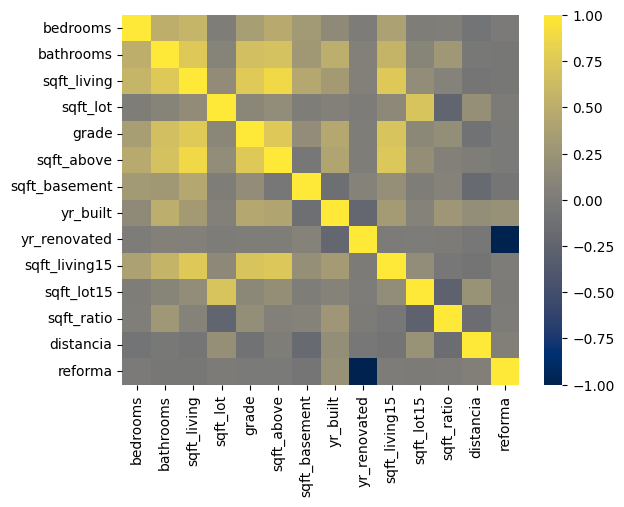

In [ ]:
sns.heatmap(x_train.drop(['floors', 'waterfront', 'view', 'condition', 'zipcode', 'lat', 'long'], axis=1).corr(), cmap='cividis')

El número de habitaciones y baños y *grade* no son variables continuas, pero tienen un rango suficiente como para ser interesantes en la matriz de correlaciones.

# Algoritmos

In [ ]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_ratio,distancia,reforma
id,,,,,,,,,,,,,,,,,,,,,
2126059295,5,4.50,4280,8465,2.0,0,0,3,10,4280,...,2014,0,98034,47.7325,-122.165,2990,11067,0.505611,0.154651,2015
1250202660,4,1.00,2290,6300,1.5,0,4,4,7,2150,...,1921,0,98144,47.5917,-122.290,2390,6300,0.363492,0.079666,2015
6804600240,3,1.75,1920,9512,1.0,0,0,3,8,1440,...,1980,0,98011,47.7606,-122.167,1820,9512,0.201850,0.181197,2015
6788201781,4,2.00,2660,3900,1.5,0,0,4,7,1480,...,1923,0,98112,47.6398,-122.306,2350,3900,0.682051,0.110117,2015
293070270,4,3.50,3560,4951,2.0,0,0,3,9,3560,...,2014,0,98074,47.6178,-122.055,3540,5500,0.719047,0.159112,2015


Realizamos el mismo preprocesado en los subconjuntos de validación y de test.

In [ ]:
x_test, y_test = test.drop(['date', 'price'], axis=1), test['price']

x_test['sqft_ratio'] = x_test['sqft_living']/x_test['sqft_lot']

x_test['distancia'] = x_test.apply(lambda row: f(row['long'], row['lat']), axis=1)

x_test['reforma'] = last-x_test['yr_renovated']

In [ ]:
x_train = x_train.drop(['yr_renovated', 'zipcode', 'long'], axis=1)
x_test = x_test.drop(['yr_renovated', 'zipcode', 'long'], axis=1)

Además, eliminamos algunas de las variables que consideramos contenidas en las nuevas que hemos creado. El resto las dejamos porque, aunque tengan relación, puede ser interesante considerar alguna combinación.

Por ejemplo, una casa renovada recientemente no implica que haya sido construida hace poco, y la distancia al centro de masas no localiza una casa del todo.

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)

test_scaled = scaler.transform(x_test)

Por último, preparamos el escalado de los datos para aquellos algoritmos que lo requieran.

## Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(x_scaled, log_precios)

LinearRegression()

In [ ]:
y_pred = np.exp(lm.predict(test_scaled))

r2_lm, rmse_lm = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_lm, rmse_lm

(0.7356054121179703, 176476.69000635523)

## K-NN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [ ]:
param_grid = {'n_neighbors': range(2, 11)}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

grid_search_knn.fit(x_scaled, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_knn.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_knn.best_score_))

Mejor conjunto de parámetros:  {'n_neighbors': 9}
Mejor puntuación de validación cruzada: 0.83


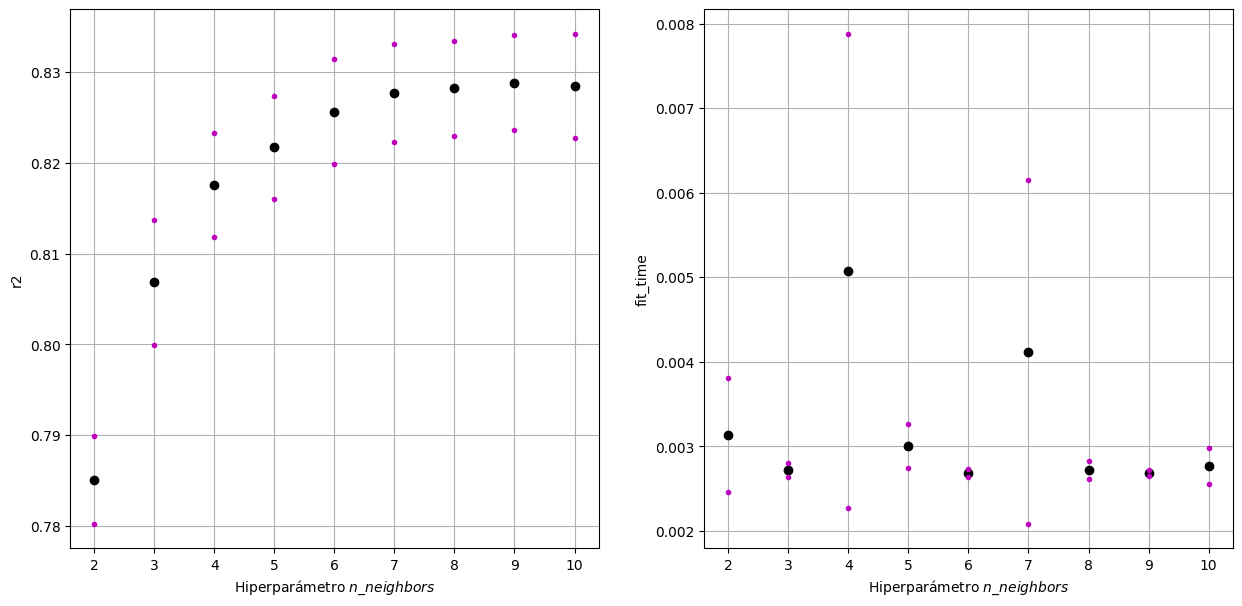

In [ ]:
%matplotlib inline

n_neighbors = [i for i in range(2, 11)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(n_neighbors, grid_search_knn.cv_results_['mean_test_score'], 'ok')
ax1.plot(n_neighbors, grid_search_knn.cv_results_['mean_test_score'] + grid_search_knn.cv_results_['std_test_score'], '.m')
ax1.plot(n_neighbors, grid_search_knn.cv_results_['mean_test_score'] - grid_search_knn.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $n\_neighbors$')
ax1.set_ylabel('r2')
ax1.grid(True)

ax2.plot(n_neighbors, grid_search_knn.cv_results_['mean_fit_time'], 'ok')
ax2.plot(n_neighbors, grid_search_knn.cv_results_['mean_fit_time'] + grid_search_knn.cv_results_['std_fit_time'], '.m')
ax2.plot(n_neighbors, grid_search_knn.cv_results_['mean_fit_time'] - grid_search_knn.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $n\_neighbors$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Dado que el *score* es algo superior y el tiempo de entrenamiento apenas varía, nos quedamos con 9 vecinos.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)

knn.fit(x_scaled, log_precios)
y_pred = np.exp(knn.predict(test_scaled))

r2_knn, rmse_knn = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_knn, rmse_knn

(0.8022753984568948, 152612.96274228822)

## Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arbol = DecisionTreeRegressor()

In [ ]:
param_grid = {'max_depth': range(4, 15)}

grid_search_arbol = GridSearchCV(arbol, param_grid, cv=5, scoring='r2')

grid_search_arbol.fit(x_train, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_arbol.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_arbol.best_score_))

Mejor conjunto de parámetros:  {'max_depth': 10}
Mejor puntuación de validación cruzada: 0.81


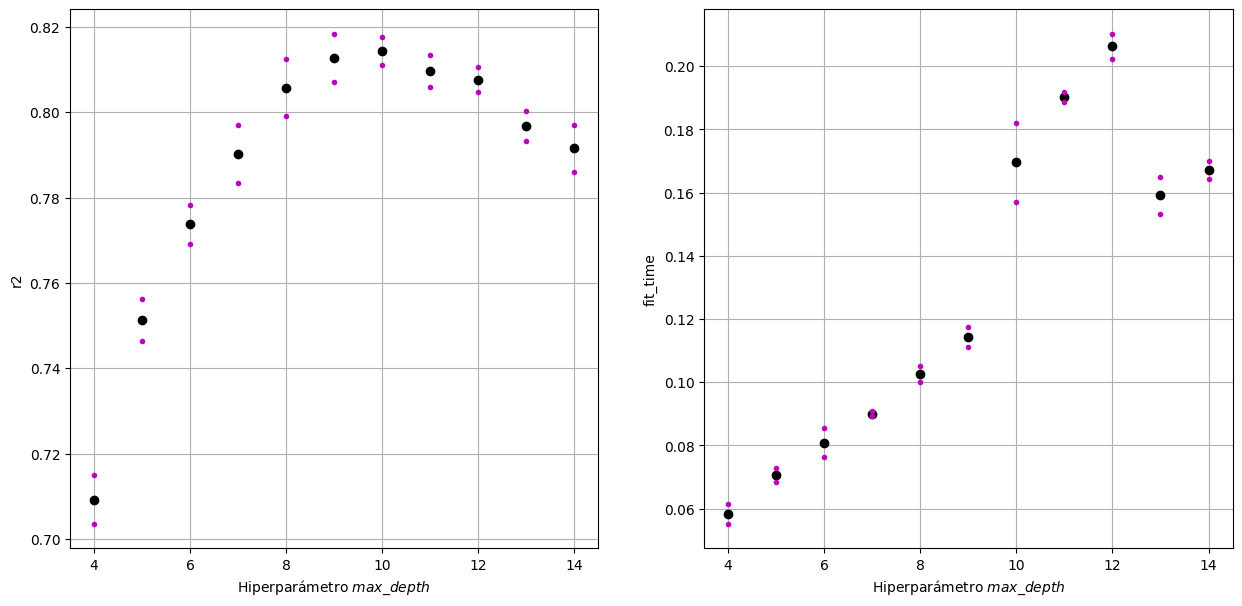

In [ ]:
depths = [i for i in range(4,15)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(depths, grid_search_arbol.cv_results_['mean_test_score'], 'ok')
ax1.plot(depths, grid_search_arbol.cv_results_['mean_test_score'] + grid_search_arbol.cv_results_['std_test_score'], '.m')
ax1.plot(depths, grid_search_arbol.cv_results_['mean_test_score'] - grid_search_arbol.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $max\_depth$')
ax1.set_ylabel('r2')
ax1.grid(True)

ax2.plot(depths, grid_search_arbol.cv_results_['mean_fit_time'], 'ok')
ax2.plot(depths, grid_search_arbol.cv_results_['mean_fit_time'] + grid_search_arbol.cv_results_['std_fit_time'], '.m')
ax2.plot(depths, grid_search_arbol.cv_results_['mean_fit_time'] - grid_search_arbol.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $max\_depth$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Estudiando las evoluciones del *score* y los tiempos de entrenamiento, concluimos que el mejor parámetro es *max_depth* = 9.

In [ ]:
arbol = DecisionTreeRegressor(max_depth=9)

arbol.fit(x_train, log_precios)
y_pred = np.exp(arbol.predict(x_test))

r2_arbol, rmse_arbol = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_arbol, rmse_arbol

(0.7511384953908373, 171214.25889869203)

## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()

In [ ]:
param_grid = {'n_estimators': [100, 150, 200]}

grid_search_bagging = GridSearchCV(bagging, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search_bagging.fit(x_scaled, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_bagging.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_bagging.best_score_))

Mejor conjunto de parámetros:  {'n_estimators': 200}
Mejor puntuación de validación cruzada: 0.88


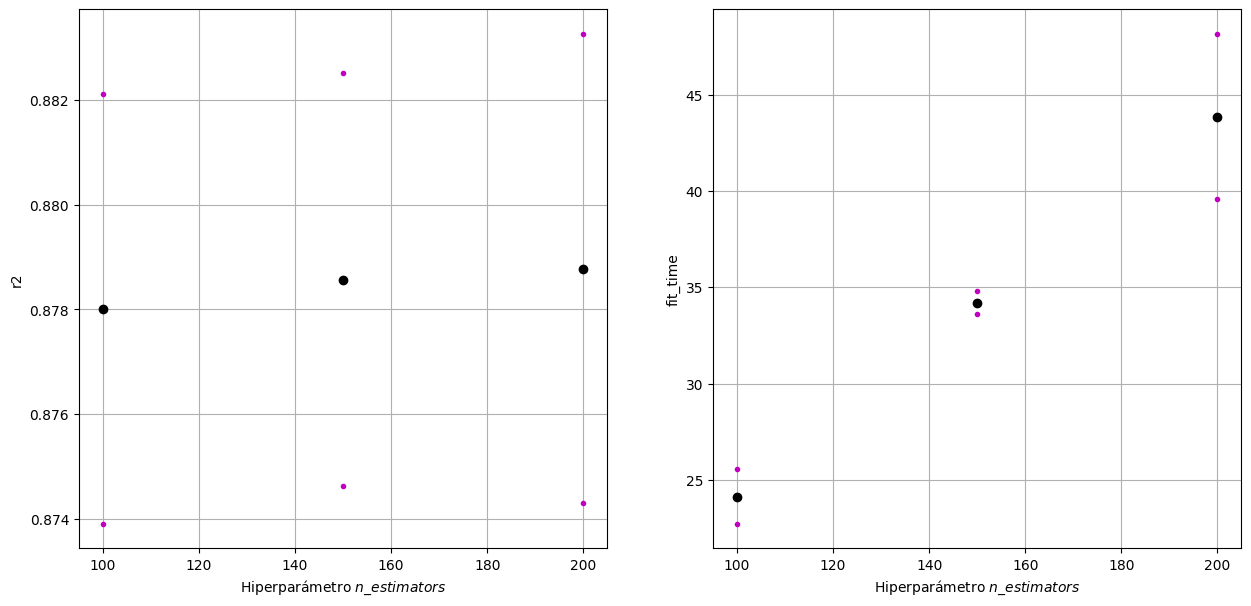

In [ ]:
n_estimators = [100, 150, 200]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(n_estimators, grid_search_bagging.cv_results_['mean_test_score'], 'ok')
ax1.plot(n_estimators, grid_search_bagging.cv_results_['mean_test_score'] + grid_search_bagging.cv_results_['std_test_score'], '.m')
ax1.plot(n_estimators, grid_search_bagging.cv_results_['mean_test_score'] - grid_search_bagging.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $n\_estimators$')
ax1.set_ylabel('r2')
ax1.grid(True)

ax2.plot(n_estimators, grid_search_bagging.cv_results_['mean_fit_time'], 'ok')
ax2.plot(n_estimators, grid_search_bagging.cv_results_['mean_fit_time'] + grid_search_bagging.cv_results_['std_fit_time'], '.m')
ax2.plot(n_estimators, grid_search_bagging.cv_results_['mean_fit_time'] - grid_search_bagging.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $n\_estimators$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Como el *score* no mejora sustancialmente pero sí aumenta el tiempo de entrenamiento, nos quedamos con 100 estimadores.

In [ ]:
bagging = BaggingRegressor(n_estimators=100)

bagging.fit(x_scaled, log_precios)
y_pred = np.exp(bagging.predict(test_scaled))

r2_bagging, rmse_bagging = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_bagging, rmse_bagging

(0.858528930972733, 129090.67946910793)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor()

In [103]:
param_grid = {'max_depth': range(12, 17)}
# Anteriormente se ha probado con distintos valores de n_estimators

grid_search_bosque = GridSearchCV(bosque, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search_bosque.fit(x_train, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_bosque.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_bosque.best_score_))

Mejor conjunto de parámetros:  {'max_depth': 16}
Mejor puntuación de validación cruzada: 0.88


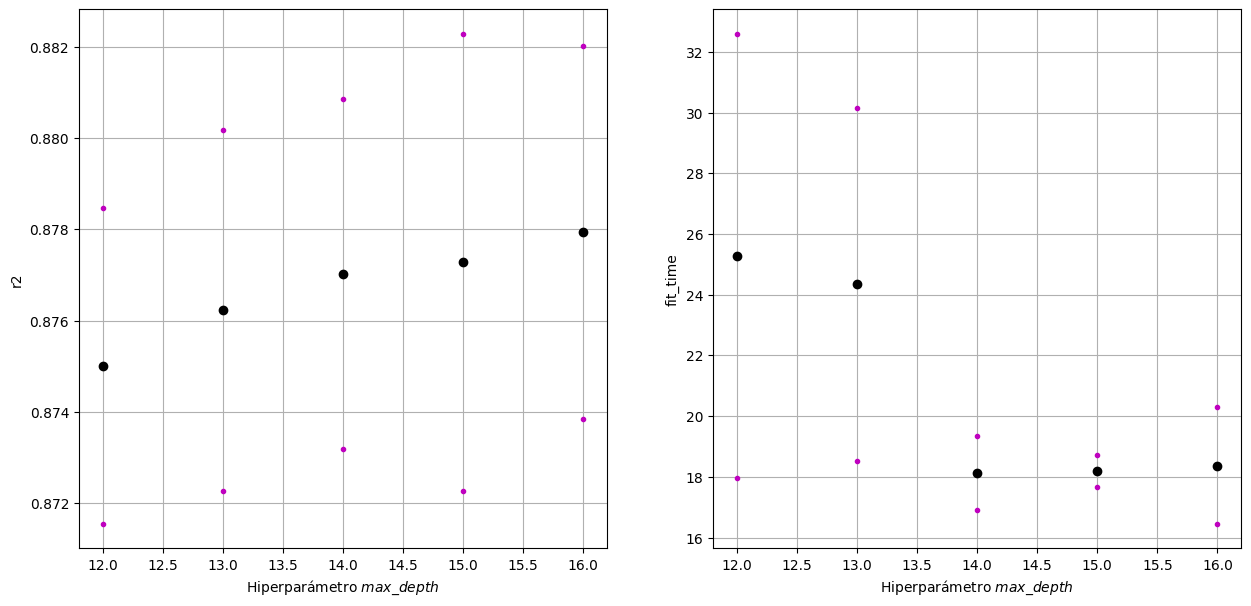

In [105]:
max_depth = [i for i in range(12,17)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(max_depth, grid_search_bosque.cv_results_['mean_test_score'], 'ok')
ax1.plot(max_depth, grid_search_bosque.cv_results_['mean_test_score'] + grid_search_bosque.cv_results_['std_test_score'], '.m')
ax1.plot(max_depth, grid_search_bosque.cv_results_['mean_test_score'] - grid_search_bosque.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $max\_depth$')
ax1.set_ylabel('r2')
ax1.grid(True)

ax2.plot(max_depth, grid_search_bosque.cv_results_['mean_fit_time'], 'ok')
ax2.plot(max_depth, grid_search_bosque.cv_results_['mean_fit_time'] + grid_search_bosque.cv_results_['std_fit_time'], '.m')
ax2.plot(max_depth, grid_search_bosque.cv_results_['mean_fit_time'] - grid_search_bosque.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $max\_depth$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Evaluando de forma conjunta el *score* y los tiempos de entrenamiento, la selección de hiperparámetros óptima parece *max_depth*=14.

In [106]:
bosque = RandomForestRegressor(max_depth=14)

bosque.fit(x_train, log_precios)
y_pred = np.exp(bosque.predict(x_test))

r2_bosque, rmse_bosque = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_bosque, rmse_bosque

(0.8519345265542182, 132065.0709118856)

## Gradient Boost

Se empleará *HistGradientBoostingRegressor*, que es más rápido que el normal a partir del 10.000 datos.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

gradient_boost = HistGradientBoostingRegressor() 

In [ ]:
param_grid = {'max_depth': range(6, 15)}

grid_search_gradientboost = GridSearchCV(gradient_boost, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search_gradientboost.fit(x_scaled, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_gradientboost.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_gradientboost.best_score_))

Mejor conjunto de parámetros:  {'max_depth': 12}
Mejor puntuación de validación cruzada: 0.89


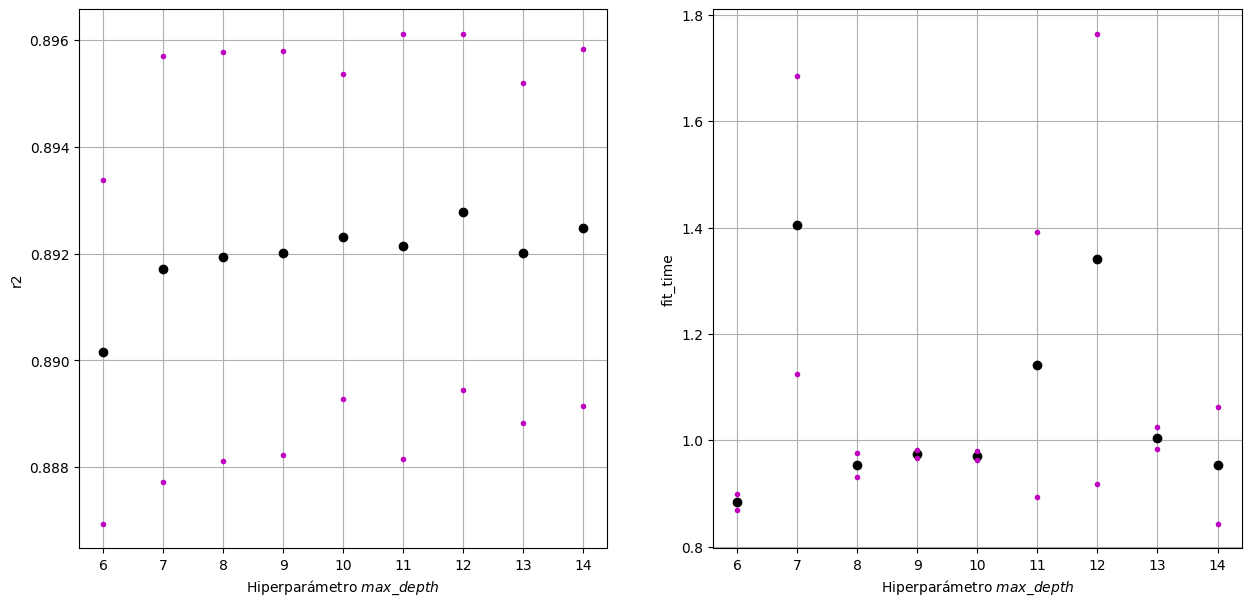

In [ ]:
depths = [i for i in range(6,15)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(depths, grid_search_gradientboost.cv_results_['mean_test_score'], 'ok')
ax1.plot(depths, grid_search_gradientboost.cv_results_['mean_test_score'] + grid_search_gradientboost.cv_results_['std_test_score'], '.m')
ax1.plot(depths, grid_search_gradientboost.cv_results_['mean_test_score'] - grid_search_gradientboost.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $max\_depth$')
ax1.set_ylabel('r2')
ax1.grid(True)

ax2.plot(depths, grid_search_gradientboost.cv_results_['mean_fit_time'], 'ok')
ax2.plot(depths, grid_search_gradientboost.cv_results_['mean_fit_time'] + grid_search_gradientboost.cv_results_['std_fit_time'], '.m')
ax2.plot(depths, grid_search_gradientboost.cv_results_['mean_fit_time'] - grid_search_gradientboost.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $max\_depth$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Nos quedamos con el hiperparámetro *max_depth* = 10, ya que obtiene buenos resultados y parece más estable en los tiempos de entrenamiento.

In [107]:
gradient_boost = HistGradientBoostingRegressor(max_depth=10)

gradient_boost.fit(x_scaled, log_precios)
y_pred = np.exp(gradient_boost.predict(test_scaled))

r2_gradient_boost, rmse_gradient_boost = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_gradient_boost, rmse_gradient_boost

(0.8927268698462245, 112410.41358188665)

## XGBoost

In [ ]:
# !pip install xgboost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=log_precios)
dtest = xgb.DMatrix(x_test, label=y_test)

xgboost = xgb.XGBRegressor()

In [ ]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': range(5,10)}

grid_search_xgboost = GridSearchCV(xgboost, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search_xgboost.fit(x_train, log_precios)

print("Mejor conjunto de parámetros: ", grid_search_xgboost.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_xgboost.best_score_))

Mejor conjunto de parámetros:  {'max_depth': 6, 'n_estimators': 100}
Mejor puntuación de validación cruzada: 0.89


<ipython-input-98-4f7fcd1acceb>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i50], 'ok', color='blue', label='n_estimators = 50')
<ipython-input-98-4f7fcd1acceb>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i100], 'ok' , color='green', label='n_estimators = 100')
<ipython-input-98-4f7fcd1acceb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i150], 'ok', color='red', label='n_estimators = 150')
<ipython-input-98-4f7fcd1acceb>:16: User

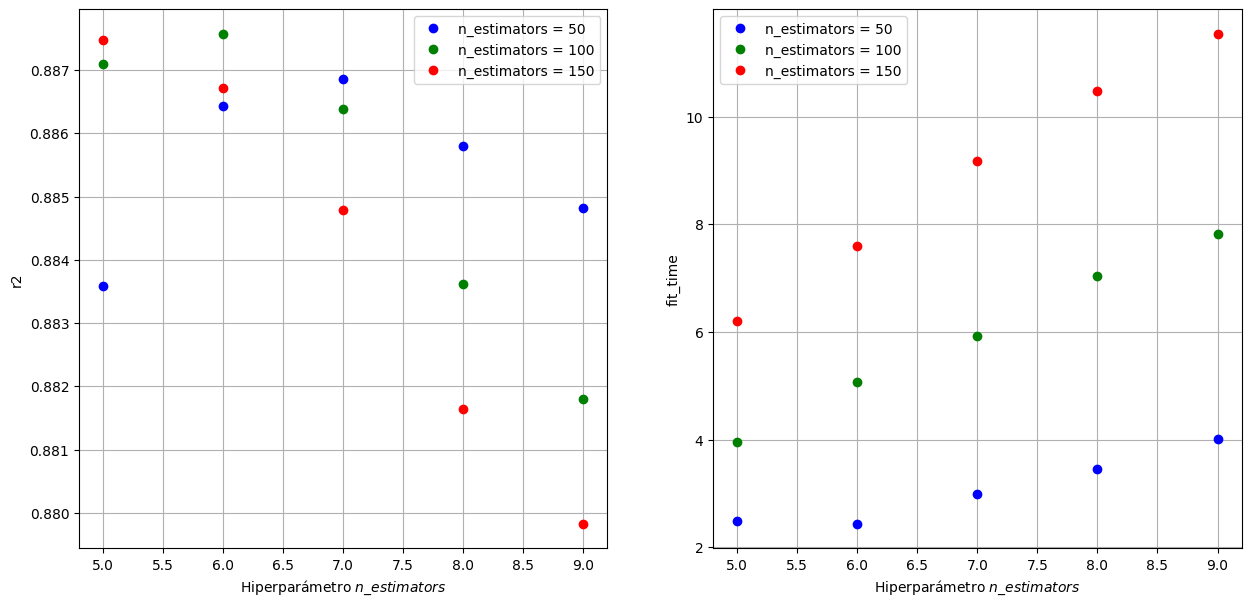

In [ ]:
max_depth = [i for i in range(5,10)]
i50 = [3*i for i in range(5)]
i100 = [3*i+1 for i in range(5)]
i150 = [3*i+2 for i in range(5)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i50], 'ok', color='blue', label='n_estimators = 50')
ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i100], 'ok' , color='green', label='n_estimators = 100')
ax1.plot(max_depth, grid_search_xgboost.cv_results_['mean_test_score'][i150], 'ok', color='red', label='n_estimators = 150')
ax1.set_xlabel('Hiperparámetro $n\_estimators$')
ax1.set_ylabel('r2')
ax1.grid(True)
ax1.legend()

ax2.plot(max_depth, grid_search_xgboost.cv_results_['mean_fit_time'][i50], 'ok', color='blue', label='n_estimators = 50')
ax2.plot(max_depth, grid_search_xgboost.cv_results_['mean_fit_time'][i100], 'ok', color='green', label='n_estimators = 100')
ax2.plot(max_depth, grid_search_xgboost.cv_results_['mean_fit_time'][i150], 'ok', color='red', label='n_estimators = 150')
ax2.set_xlabel('Hiperparámetro $n\_estimators$')
ax2.set_ylabel('fit_time')
ax2.grid(True)
ax2.legend()

Observando los gráficos, el mejor resultado se obtiene con *max_depth* = 6 y *n_estimators* = 100, que además tiene uno de los tiempos de entrenamiento más bajos, por lo que escogemos esta selección de hiperparámetros.

In [ ]:
from xgboost.sklearn import XGBRegressor
xgboost.fit(x_train, log_precios)
y_pred = np.exp(xgboost.predict(x_test))

r2_xgboost, rmse_xgboost = r2_score(y_test.values,y_pred), np.sqrt(mean_squared_error(y_test.values, y_pred))

r2_xgboost, rmse_xgboost

(0.8791830391858177, 119295.76388673858)

# Comparación de algoritmos

In [108]:
metricas = pd.DataFrame(columns = ['r2', 'RMSE'], 
                        index=['Regresion_Lineal', 'KNN', 'Arbol_Regresor', 'Bagging', 'Random_Forest', 'Gradient_Boost', 'XGBoost'])

metricas.loc['Regresion_Lineal'] = [r2_lm, rmse_lm]
metricas.loc['KNN'] = [r2_knn, rmse_knn]
metricas.loc['Arbol_Regresor'] = [r2_arbol, rmse_arbol]
metricas.loc['Bagging'] = [r2_bagging, rmse_bagging]
metricas.loc['Random_Forest'] = [r2_bosque, rmse_bosque]
metricas.loc['Gradient_Boost'] = [r2_gradient_boost, rmse_gradient_boost]
metricas.loc['XGBoost'] = [r2_xgboost, rmse_xgboost]

metricas

,r2,RMSE
Regresion_Lineal,0.735605,176476.690006
KNN,0.802275,152612.962742
Arbol_Regresor,0.751138,171214.258899
Bagging,0.858529,129090.679469
Random_Forest,0.851935,132065.070912
Gradient_Boost,0.892727,112410.413582
XGBoost,0.879183,119295.763887


In [109]:
metricas.sort_values(by='r2', ascending=False)

,r2,RMSE
Gradient_Boost,0.892727,112410.413582
XGBoost,0.879183,119295.763887
Bagging,0.858529,129090.679469
Random_Forest,0.851935,132065.070912
KNN,0.802275,152612.962742
Arbol_Regresor,0.751138,171214.258899
Regresion_Lineal,0.735605,176476.690006


Los valores de *RMSE* están también en orden, es decir, no hay diferencia entre usar una métrica u otra para compararlos.

# Importancia de las variables

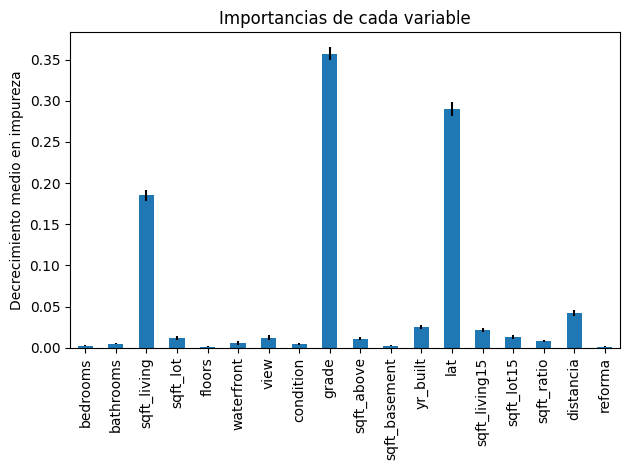

In [110]:
importancias = bosque.feature_importances_
std = np.std([tree.feature_importances_ for tree in bosque.estimators_], axis=0)
importancias_bosque = pd.Series(importancias, index=x_train.columns)

fig, ax = plt.subplots()
importancias_bosque.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancias de cada variable")
ax.set_ylabel("Decrecimiento medio en impureza")
fig.tight_layout()